In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from RobotSim373 import *

Version:  0.0.32


In [3]:
def build(robot):
    box1=Box(robot,x=3,y=9.5,name="right")
    box2=Box(robot,x=3,y=11.5,name="left")    
    
    connect(box1,box2,"weld")
    
    disk1=Disk(robot,x=2,y=10.5,name="center")
    
    connect(disk1,box1,"distance")
    connect(disk1,box2,"distance")    

In [4]:
def act(t,robot):
    
    distance=robot['center'].read_distance()
    
    if distance>10:
        robot['left'].F=0.4
        robot['right'].F=0.4   
    else:
        robot['left'].F=0.1
        robot['right'].F=0.1   
    
    robot.message=distance

In [5]:
def randbetween(low,high):
    return rand()*(high-low)+low

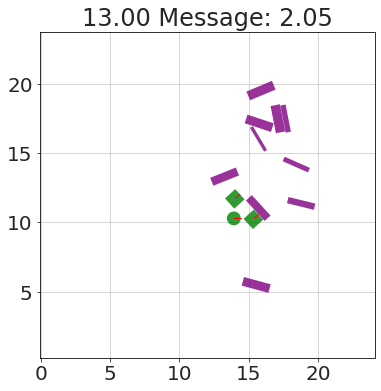

In [7]:
env=Environment(24,24)
robot=Robot(env)
build(robot)

for i in range(10):
    Box(env,x=randbetween(10,20),y=randbetween(5,20),width=randbetween(.2,.8),height=2,angle=randbetween(0,360),
            color='purple')


run_sim(env,act,
        figure_width=6,
       total_time=13,
       dt_display=0.1,  # make this larger for a faster display
       )